In [1]:
!git clone https://github.com/IEEE-CISCodeCraft/Machine-Learning-Simplified.git

Cloning into 'Machine-Learning-Simplified'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 31 (delta 1), reused 16 (delta 1), pack-reused 15
Receiving objects: 100% (31/31), 377.63 KiB | 6.63 MiB/s, done.
Resolving deltas: 100% (4/4), done.


#Replace the <code>None</code> instances pesent in the code.

In [3]:
!cp "/content/Machine-Learning-Simplified/Day-1/LRTestCases.py" "/content/"

In [4]:
from LRTestCases import *

In [5]:
def error(yhat, y):
    error = yhat - y #Subtract y from yhat
    return error

In [6]:
#TEST YOUR IMPLEMENTATION
test_error_function(error)

Test passed!


In [7]:
def error_square(error):
    square = error ** 2        #Square the error claculated above
    return square

In [8]:
#TEST YOUR IMPLEMENTATION
test_error_square_function(error_square)

Test passed!


In [9]:
def total_squared_error(error, num):
    total_squared_error = 0
    for i in range(num):
      total_squared_error = total_squared_error + error     #Add the "error" to the "total_sqared_error"
    return total_squared_error

In [10]:
#TEST YOUR IMPLEMENTATION
test_total_squared_error_function(total_squared_error)

Test passed!


$\text{Mean Squared Error}=\frac{1}{2*m}\sum\limits_{i = 0}^{m-1}(y-ŷ)^2$

In [11]:
def mse(total_squared_error, num):
    denominator = num/2         #Multipy num with 2
    mse = total_squared_error / denominator  #Divide "total_sqaured_error" by "denominator"
    return num

In [12]:
#TEST YOUR IMPLEMENTATION
test_mse_function(mse)

Test passed!


**Finding the predicted value**

In [13]:
def predicted_value(w, x, b):
    yhat =( w * x )+ b    #Multiply 'w' with 'x' and add 'b'
    return yhat

In [14]:
#TEST YOUR IMPLEMENTATION
test_predicted_value(predicted_value)

Test passed!


## Cost Function
The equation for cost with one variable is:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (ŷ - y^{(i)})^2$$

In [21]:
def compute_cost(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    total_squared_error = 0
    for i in range(m):
        yhat = w * x[i] + b
        error = y[i]-yhat         #Subtract "y[i]" from "yhat"
        squared_error = error**2   #Square the error
        total_squared_error = error +total_squared_error  #Add the "error" to the "total_sqared_error"
    denominator = m*2     #Multiply m by 2
    total_cost = total_squared_error/denominator      #Divide total_squared_error by denominator
    return total_cost

# Gradient Descent
## 1. Compute Gradient
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (ŷ - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (ŷ - y^{(i)}) \\
\end{align}
$$

In [19]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        yhat = w * x[i] + b
        dj_dw_i = (yhat - y[i]) * x[i]
        dj_db_i = yhat - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [20]:
test_compute_gradient(compute_gradient)

Test passed!


## 2. Update the parameters <code>num_iterations</code> times
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.

In [22]:
def gradient_descent(x, y, learning_rate, num_iterations):
    # Initialize weights and bias
    w = 0
    b = 0
    # Number of training examples
    m = x.shape[0]
    for _ in range(num_iterations):
        # Compute gradients using the compute_gradient function
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update weights and bias
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        # Compute the cost for monitoring
        cost = compute_cost(x, y, w, b)
        print(f'Iteration {_+1}/{num_iterations}, Cost: {cost:.6f}')
    return w, b

In [23]:
test_gradient_descent(gradient_descent, compute_cost, compute_gradient)

Iteration 1/10, Cost: 1.782000
Iteration 2/10, Cost: 1.589760
Iteration 3/10, Cost: 1.420232
Iteration 4/10, Cost: 1.270730
Iteration 5/10, Cost: 1.138884
Iteration 6/10, Cost: 1.022606
Iteration 7/10, Cost: 0.920053
Iteration 8/10, Cost: 0.829601
Iteration 9/10, Cost: 0.749820
Iteration 10/10, Cost: 0.679447
Final parameters: w = 0.7955, b = 0.2545
Final cost: 0.679447
Test passed!


# **Project:** Melanoma Tumor Size Prediction

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Read the dataset
data = pd.read_csv('/content/Machine-Learning-Simplified/Day-1/melanoma_dataset.csv')

<Axes: xlabel='mass_npea', ylabel='tumor_size'>

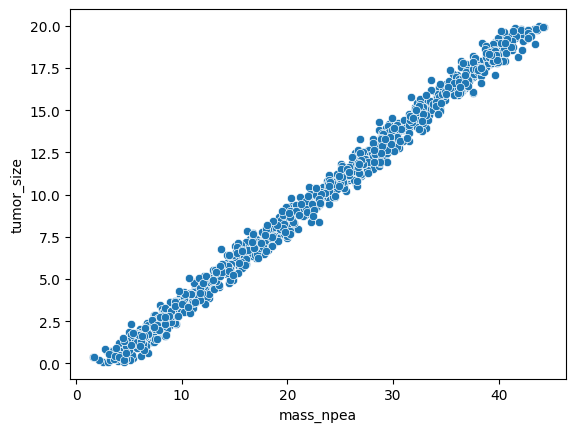

In [32]:
#Display the dataset
sns.scatterplot(x='mass_npea', y='tumor_size', data=data)

In [33]:
#Gain insights of dataset

In [34]:
#Plot a graph to check linearity
data.describe()

,mass_npea,tumor_size
count,1000.000000,1000.000000
mean,22.709158,9.805131
std,11.682122,5.842747
min,1.575483,0.092640
25%,12.290811,4.719465
50%,22.968280,9.936148
75%,32.664439,14.886392
max,44.255681,19.994353


In [37]:
#Extract X and Y from data
X = data[['mass_npea']]
Y = data['tumor_size']

In [39]:
#Train a Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [43]:
#Evaluate the Model
y_pred = model.predict(X)
mse = mean_squared_error(Y, y_pred)
mse

0.24388273258319765

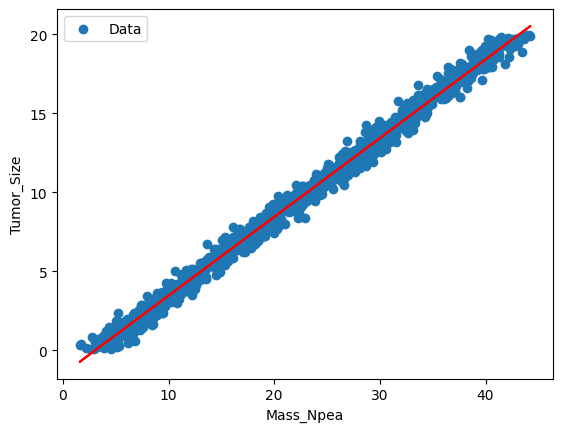

In [49]:
# Plot the data and regression line
# plt.scatter(X, Y, label='Data')
plt.scatter(X, Y, label='Data')
plt.plot(X, y_pred, color='red' )
plt.xlabel('Mass_Npea')
plt.ylabel('Tumor_Size')
plt.legend()
plt.show()